# Plant Leaf Classification

Autonomus University of San Luis Potosi

Luis Angel Sánchez Muñiz

Faculty Key: 202102300011

UASLP Key: 0337911

Advisser: Juan Carlos Cuevas Tello

In [1]:
# needed libraries
# !pip install tensorflow opencv-python matplotlib

In [2]:
import tensorflow as tf
import os

In [3]:
data_path = "plant_leaf/Plant_leave_diseases_dataset_without_augmentation"
os.listdir(data_path)

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry___healthy',
 'Cherry___Powdery_mildew',
 'Corn___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn___Common_rust',
 'Corn___healthy',
 'Corn___Northern_Leaf_Blight',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___healthy',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___healthy',
 'Potato___Late_blight',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___healthy',
 'Strawberry___Leaf_scorch',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___healthy',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomat

In [4]:
import cv2
import imghdr
from matplotlib import pyplot as plt

C:\Users\luisa\AppData\Local\Temp\ipykernel_3516\3427753027.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [5]:
image_ext = ['jpg', 'jpeg', 'bmp', 'png' ]

In [6]:
def image_validation(data_path):
    for image_class in os.listdir(data_path): 
        for image in os.listdir(os.path.join(data_path, image_class)):
            image_path = os.path.join(data_path,image_class, image)
            try: 
                img = cv2.imread(image_path)
                tip = imghdr.what(image_path)
                if tip not in image_ext:
                    print('Image not in ext list{}'.format(image_path))
                    os.remove(image_path)
            except Exception as e:
                print('Issue with image {}'.format(image_path))

In [7]:
image_validation(data_path)

Issue with image plant_leaf/Plant_leave_diseases_dataset_without_augmentation\Apple___Black_rot\.ipynb_checkpoints


### Load the data

In [8]:
data = tf.keras.utils.image_dataset_from_directory(data_path, image_size=(128,128))

Found 54307 files belonging to 38 classes.


In [9]:
tf.keras.utils.image_dataset_from_directory??

Signature:
tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    data_format=None,
)
Source:   
@keras_export(
    [
        "keras.utils.image_dataset_from_directory",
        "keras.preprocessing.image_dataset_from_directory",
    ]
)
def image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    data_format=None,
):
    """Generates a `tf.data.Dataset` from image files in a directory.

    If your 

In [10]:
data_iterator = data.as_numpy_iterator()

In [11]:
batch = data_iterator.next()

In [12]:
batch[0].shape

(32, 128, 128, 3)

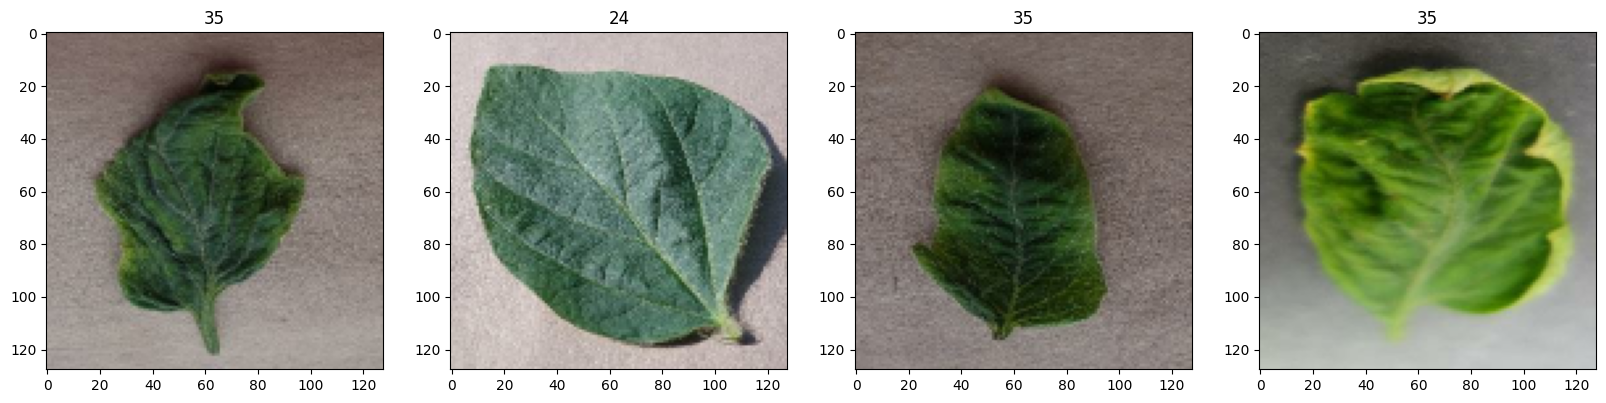

In [13]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [14]:
def normalize(x):
    return x/255
    
data = data.map(lambda x,y: normalize(x), y)

In [15]:
data_iterator = data.as_numpy_iterator()

In [16]:
batch = data_iterator.next()

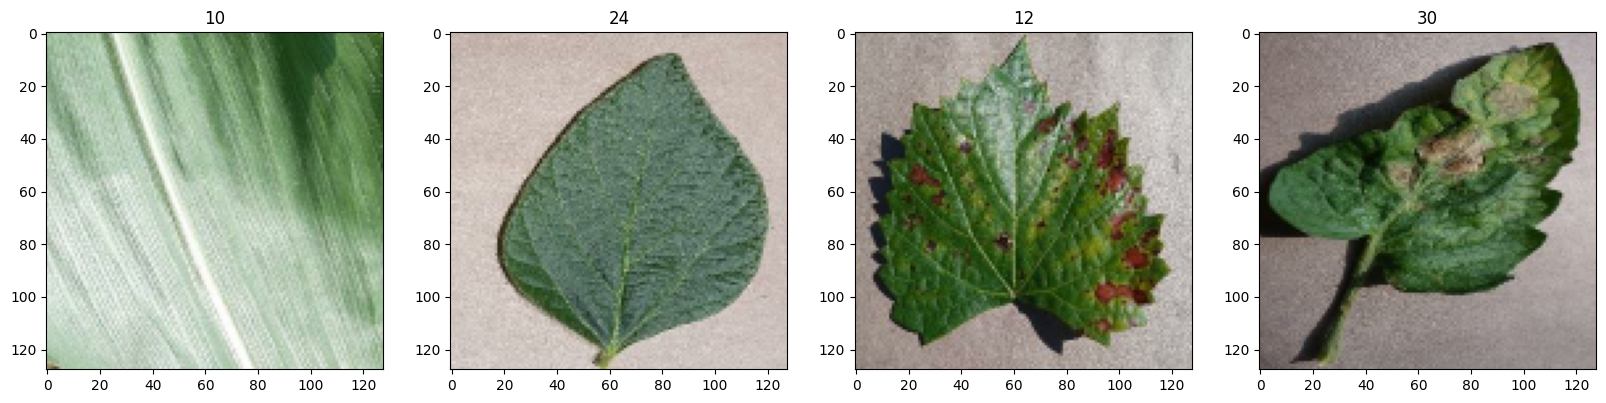

In [17]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

### Split the data

In [18]:
data_train = data.take(int(len(data)*.4) + 1)

In [19]:
# Size
train_size = int(len(data_train)*.7)
test_size = int(len(data_train)*.1) + 1
val_size = int(len(data_train)*.2) + 1

In [20]:
[train_size, test_size, val_size] 

[475, 69, 137]

In [21]:
# Splitting
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [22]:
iter = train.as_numpy_iterator()
batch = iter.next()
batch[1]

array([15, 25, 24, 21, 13, 25, 17, 19, 31,  1, 16, 24, 20, 32,  7, 24, 19,
       33, 15, 16, 36, 37, 35, 35, 28, 33, 15, 15, 37, 20, 21,  6])

In [23]:
batch[0].shape

(32, 128, 128, 3)

In [24]:
all_train_images = []
all_train_labels = []

for batch in train.as_numpy_iterator():
    images, labels = batch
    all_train_images.extend(images)
    all_train_labels.extend(labels)

In [25]:
all_test_images = []
all_test_labels = []

for batch in test.as_numpy_iterator():
    images, labels = batch
    all_test_images.extend(images)
    all_test_labels.extend(labels)

In [26]:
all_val_images = []
all_val_labels = []

for batch in val.as_numpy_iterator():
    images, labels = batch
    all_val_images.extend(images)
    all_val_labels.extend(labels)

In [27]:
num_classes = 38  
all_train_labels = tf.keras.utils.to_categorical(all_train_labels, num_classes)
all_test_labels = tf.keras.utils.to_categorical(all_test_labels, num_classes)
all_val_labels = tf.keras.utils.to_categorical(all_val_labels, num_classes)

In [28]:
all_val_labels.shape

(4384, 38)

### Deep Model

#### Build DLM

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [30]:
model = Sequential()
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(128,128,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(64, (3,3), 1, activation='relu')) 
model.add(Conv2D(32, (3,3), 1, activation='relu'))  
model.add(Conv2D(16, (3,3), 1, activation='relu'))   
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

C:\Users\luisa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [31]:
model.compile(optimizer='adam', 
              loss=tf.keras.losses.CategoricalCrossentropy(),  
              metrics=['accuracy'])

In [32]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 26, 26, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 24, 24, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 12, 12, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │           9,766 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 646,518 (2.47 MB)

 Trainable params: 646,518 (2.47 MB)

 Non-trainable params: 0 (0.00 B)

#### Training

In [33]:
logdir = 'logs'

In [34]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [35]:
all_train_labels.shape

(15200, 38)

In [36]:
batch = train.as_numpy_iterator().next()
print(batch[0].shape, batch[1].shape)

(32, 128, 128, 3) (32,)


In [37]:
label = tf.keras.utils.to_categorical(batch[1], num_classes)
label.shape

(32, 38)

In [38]:
test

<_TakeDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [40]:
import numpy as np
X = np.array(all_train_images)
y = all_train_labels
print(X.shape)
print(y.shape)
hist = model.fit(X, y, epochs=20)

(15200, 128, 128, 3)
(15200, 38)
Epoch 1/20
475/475 ━━━━━━━━━━━━━━━━━━━━ 39s 78ms/step - accuracy: 0.2627 - loss: 2.7936
Epoch 2/20
475/475 ━━━━━━━━━━━━━━━━━━━━ 33s 70ms/step - accuracy: 0.6168 - loss: 1.3232
Epoch 3/20
475/475 ━━━━━━━━━━━━━━━━━━━━ 33s 70ms/step - accuracy: 0.7292 - loss: 0.8787
Epoch 4/20
475/475 ━━━━━━━━━━━━━━━━━━━━ 33s 70ms/step - accuracy: 0.7905 - loss: 0.6457
Epoch 5/20
475/475 ━━━━━━━━━━━━━━━━━━━━ 33s 69ms/step - accuracy: 0.8375 - loss: 0.5039
Epoch 6/20
475/475 ━━━━━━━━━━━━━━━━━━━━ 32s 68ms/step - accuracy: 0.8629 - loss: 0.4164
Epoch 7/20
475/475 ━━━━━━━━━━━━━━━━━━━━ 32s 67ms/step - accuracy: 0.8980 - loss: 0.3142
Epoch 8/20
475/475 ━━━━━━━━━━━━━━━━━━━━ 32s 68ms/step - accuracy: 0.9128 - loss: 0.2638
Epoch 9/20
475/475 ━━━━━━━━━━━━━━━━━━━━ 33s 68ms/step - accuracy: 0.9261 - loss: 0.2246
Epoch 10/20
475/475 ━━━━━━━━━━━━━━━━━━━━ 34s 71ms/step - accuracy: 0.9359 - loss: 0.1922
Epoch 11/20
475/475 ━━━━━━━━━━━━━━━━━━━━ 34s 72ms/step - accuracy: 0.9517 - loss: 0.14

#### 

### Testing

In [41]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [42]:
X = np.array(all_test_images)
y = all_test_labels


yhat = model.predict(X)
pre.update_state(y, yhat)
re.update_state(y, yhat)
acc.update_state(y_true=y, y_pred=yhat)

69/69 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step


In [43]:
print(f'Precision:{pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy: {acc.result().numpy()}')

Precision:0.8516278862953186, Recall: 0.8292572498321533, Accuracy: 0.9917047619819641


In [44]:
# let's really test it

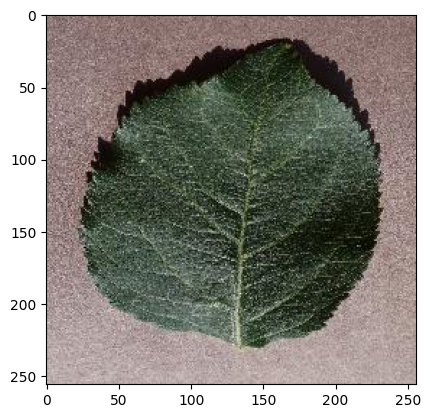

In [45]:
img = cv2.imread(os.path.join(data_path, "Apple___healthy/image (13).jpg"))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

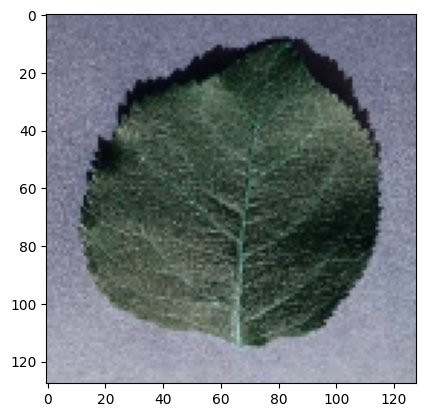

In [46]:
resize = tf.image.resize(img,(128, 128))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [47]:
resize.shape

TensorShape([128, 128, 3])

In [48]:
resize = np.expand_dims(resize/255, 0)

In [49]:
resize.shape

(1, 128, 128, 3)

In [50]:
resize.min()

0.0

In [51]:
yhat=model.predict(resize)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


for i in yhat:
    rounded_value = np.round(i, 2)
    print(rounded_value)

In [52]:
rounded_yhat = np.round(yhat, 1)
classes = os.listdir(data_path)
for i in range(38):
    print(f'{classes[i]}: {rounded_yhat[0][i]}')

Apple___Apple_scab: 0.0
Apple___Black_rot: 0.0
Apple___Cedar_apple_rust: 0.0
Apple___healthy: 1.0
Blueberry___healthy: 0.0
Cherry___healthy: 0.0
Cherry___Powdery_mildew: 0.0
Corn___Cercospora_leaf_spot Gray_leaf_spot: 0.0
Corn___Common_rust: 0.0
Corn___healthy: 0.0
Corn___Northern_Leaf_Blight: 0.0
Grape___Black_rot: 0.0
Grape___Esca_(Black_Measles): 0.0
Grape___healthy: 0.0
Grape___Leaf_blight_(Isariopsis_Leaf_Spot): 0.0
Orange___Haunglongbing_(Citrus_greening): 0.0
Peach___Bacterial_spot: 0.0
Peach___healthy: 0.0
Pepper,_bell___Bacterial_spot: 0.0
Pepper,_bell___healthy: 0.0
Potato___Early_blight: 0.0
Potato___healthy: 0.0
Potato___Late_blight: 0.0
Raspberry___healthy: 0.0
Soybean___healthy: 0.0
Squash___Powdery_mildew: 0.0
Strawberry___healthy: 0.0
Strawberry___Leaf_scorch: 0.0
Tomato___Bacterial_spot: 0.0
Tomato___Early_blight: 0.0
Tomato___healthy: 0.0
Tomato___Late_blight: 0.0
Tomato___Leaf_Mold: 0.0
Tomato___Septoria_leaf_spot: 0.0
Tomato___Spider_mites Two-spotted_spider_mite: 0